In [1]:
import importlib
import os
import pickle

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils

# RNAs

In [2]:
samples = os.listdir('data/processed')
samples = samples[1:6] + samples[7:]
rnas = ['matrix.mtx', 'matrix.mtx', 'matrix.mtx',  # Paired-seq
        'counts.txt', 'counts.txt',  # scCAT-seq
        'matrix.mtx.gz', 'counts.mtx.gz', 'matrix.mtx.gz',  # sci-CAR
        'counts.mtx.gz', 'counts.txt.gz', 'counts.mtx.gz']  # SNARE-seq

   0      1      2      3      4      5      6      7      8      9      ...  \
0      0      0      0      0      0      0      0      0      0      0  ...   
1      0      0      0      0      0      0      0      0      0      0  ...   
2      0      0      0      0      0      0      0      0      0      0  ...   
3      0      0      0      0      0      0      0      0      0      0  ...   
4      0      0      0      0      0      0      0      0      0      0  ...   
5      0      0      0      0      0      0      0      0      0      0  ...   
6      0      0      0      0      0      0      0      0      0      0  ...   
7      0      0      0      0      0      0      0      0      0      0  ...   
8      0      0      0      0      0      0      0      0      0      0  ...   
9      0      0      0      0      0      0      0      0      0      0  ...   

   15181  15182  15183  15184  15185  15186  15187  15188  15189  15190  
0      0      0      0      0      0      0  

<Figure size 15000x15000 with 0 Axes>

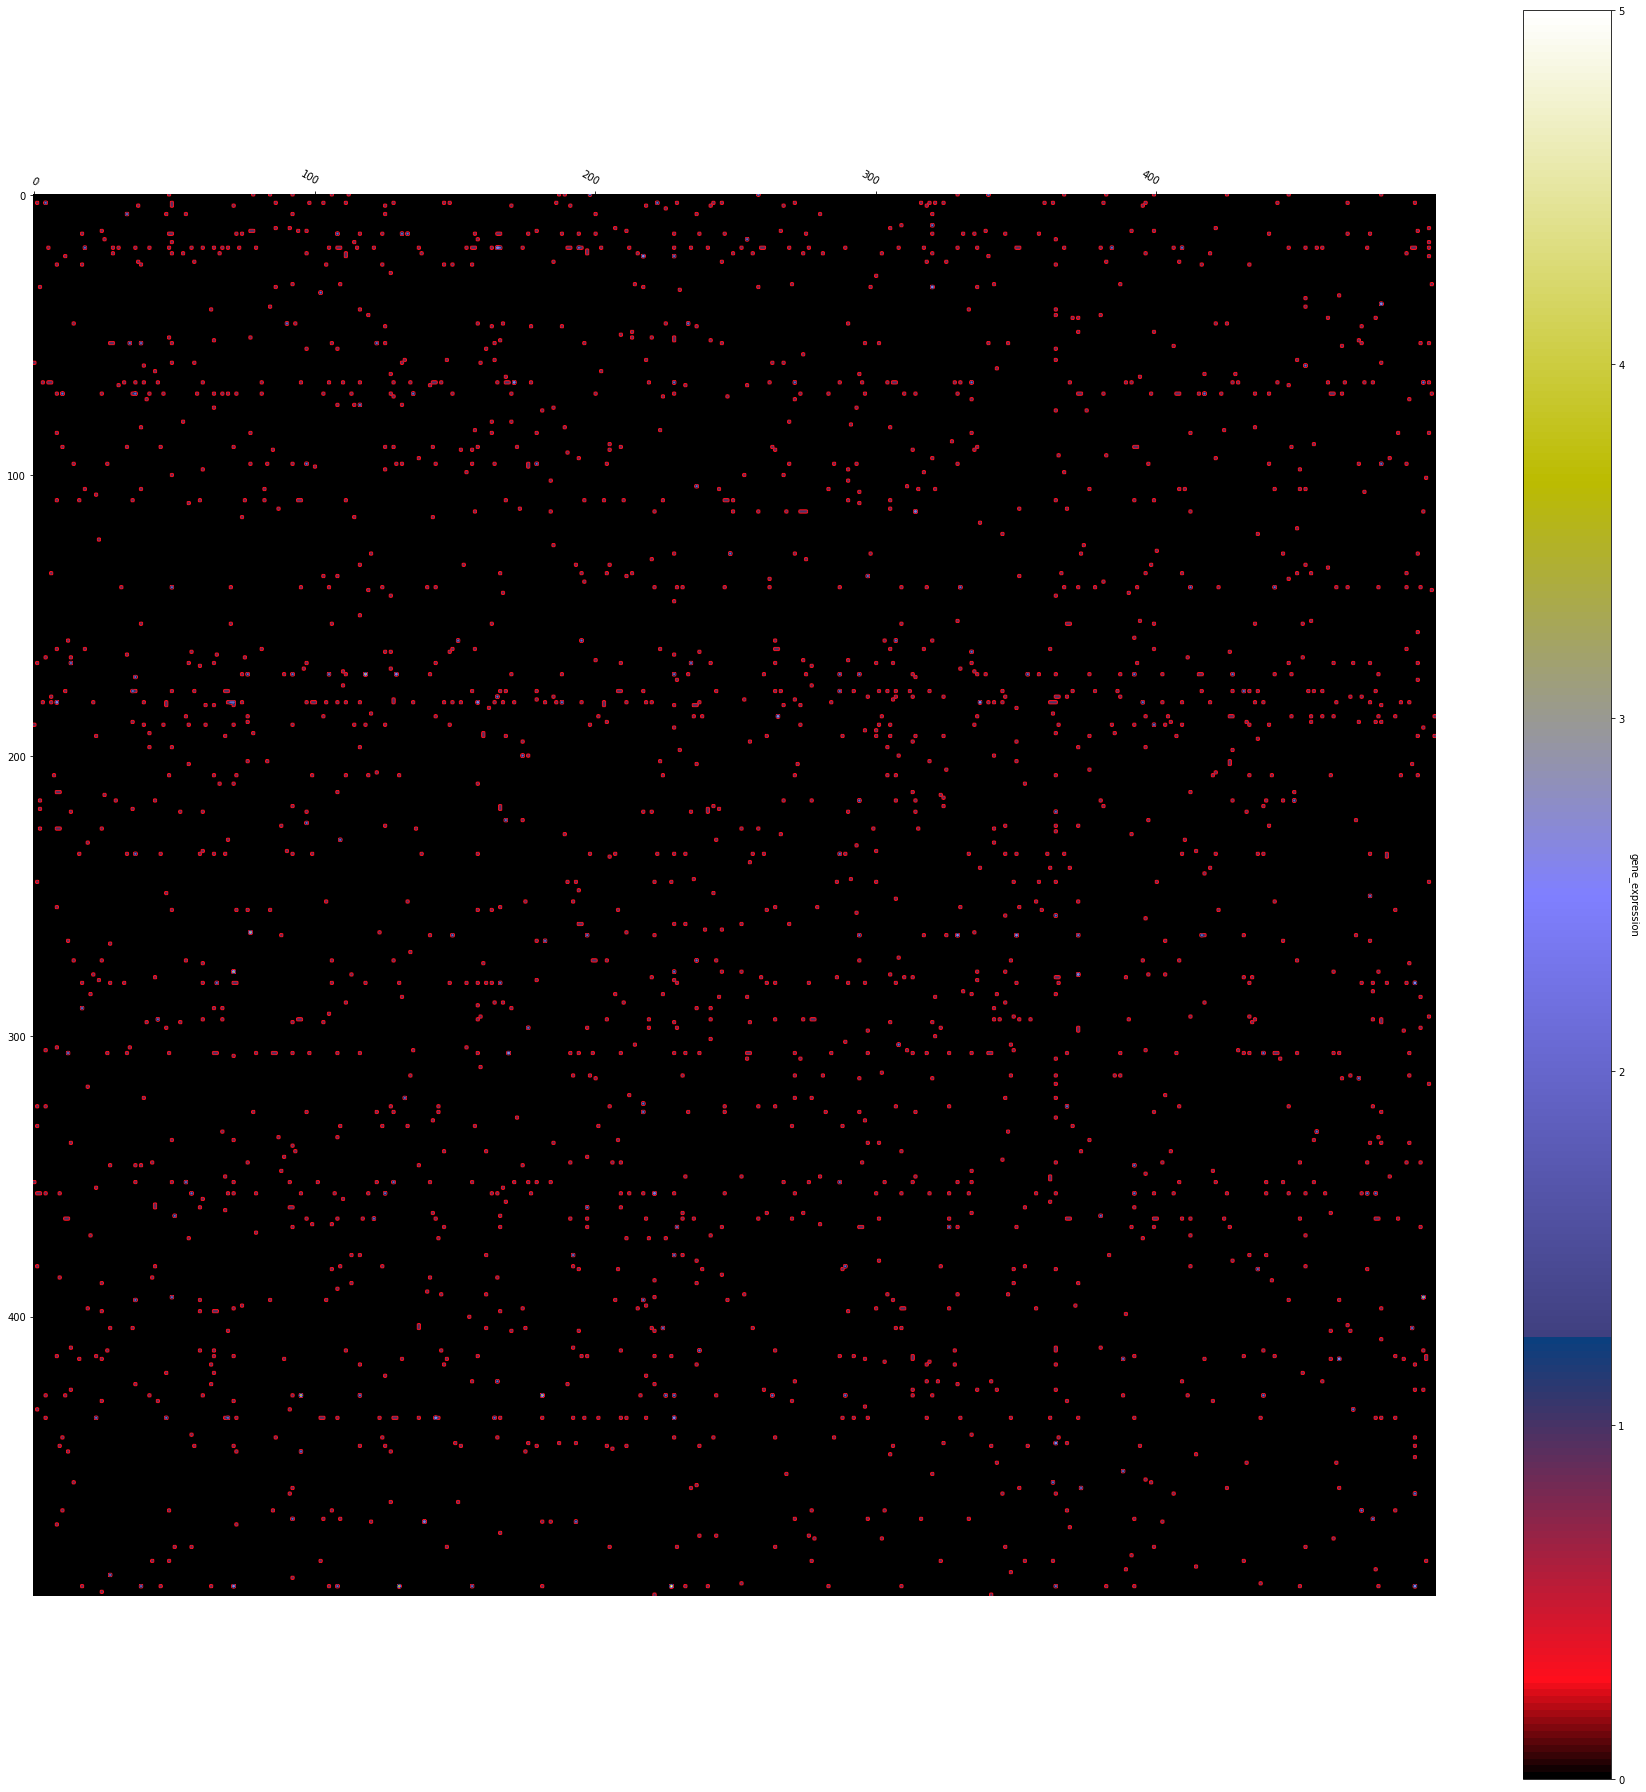

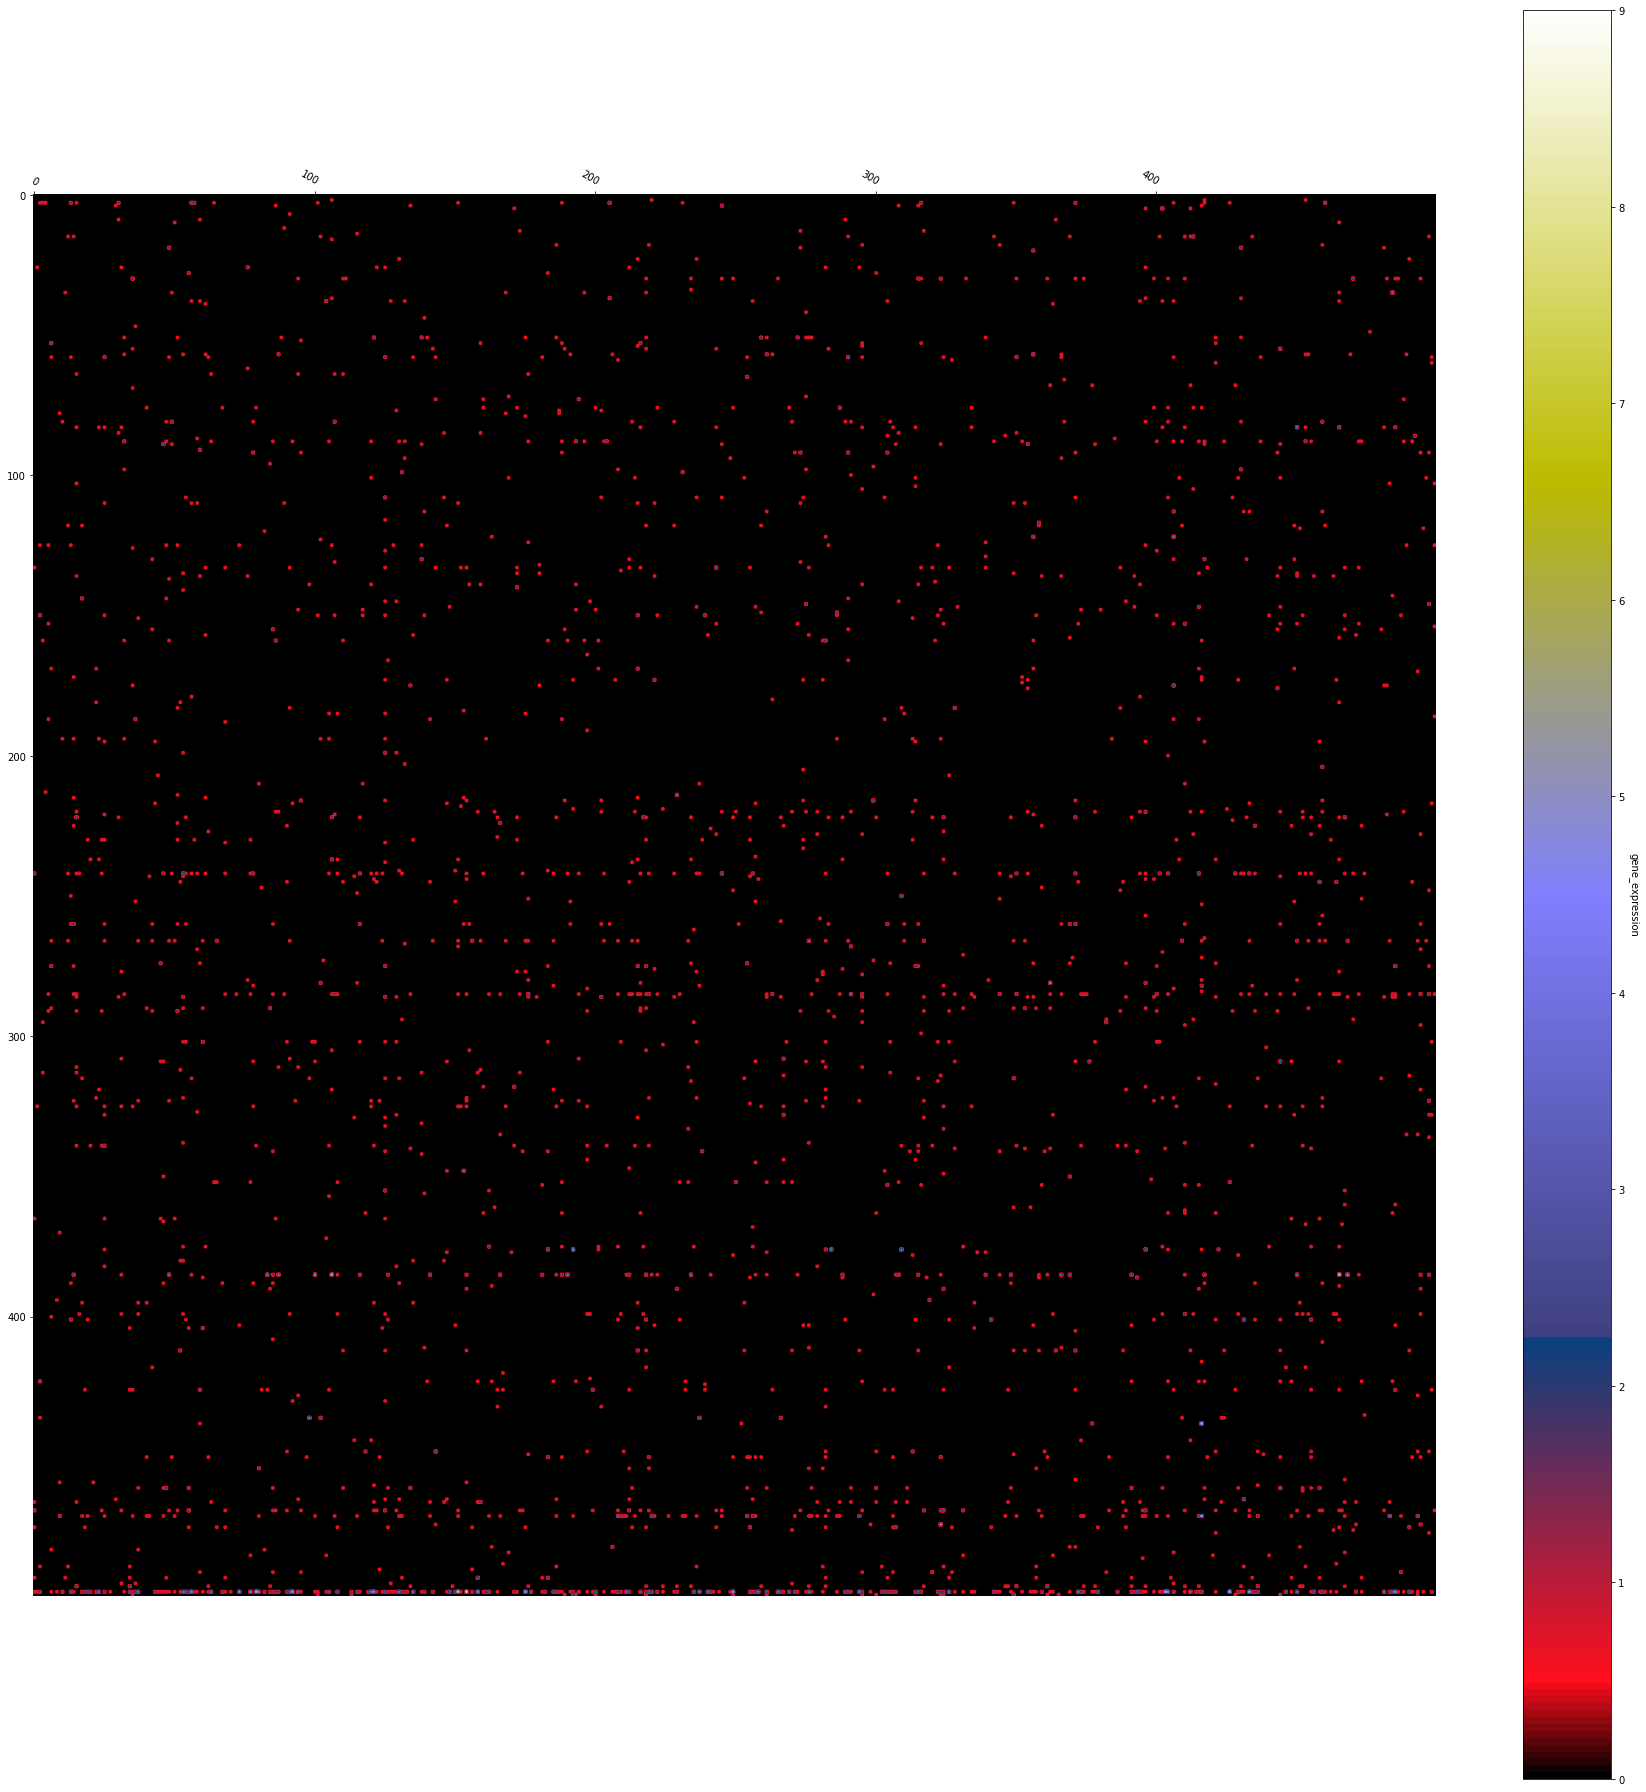

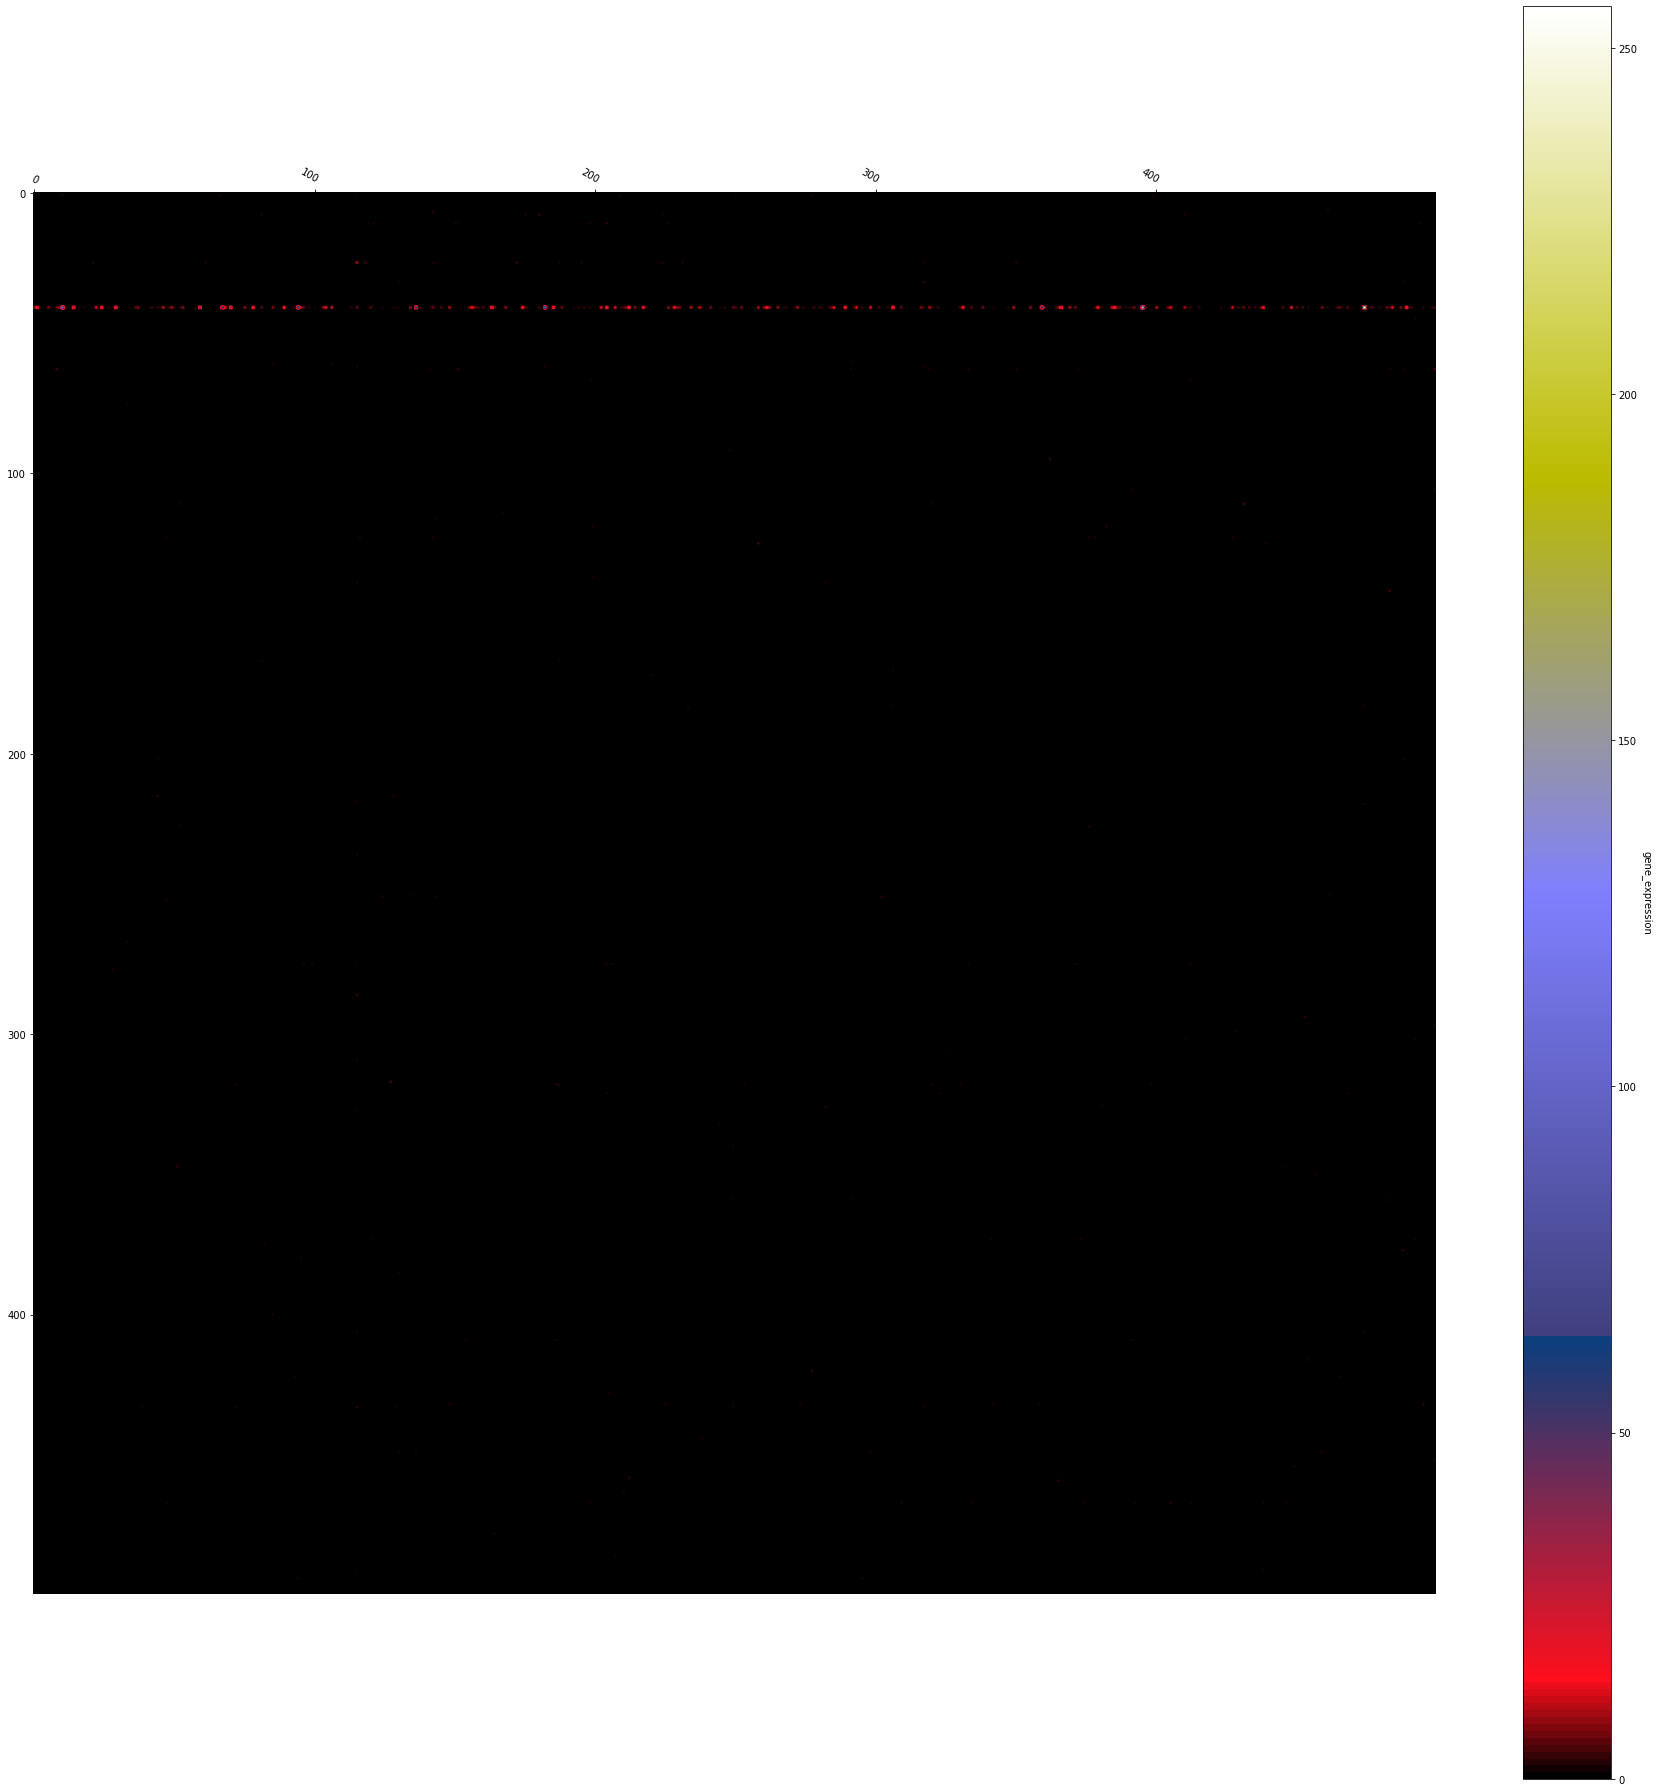

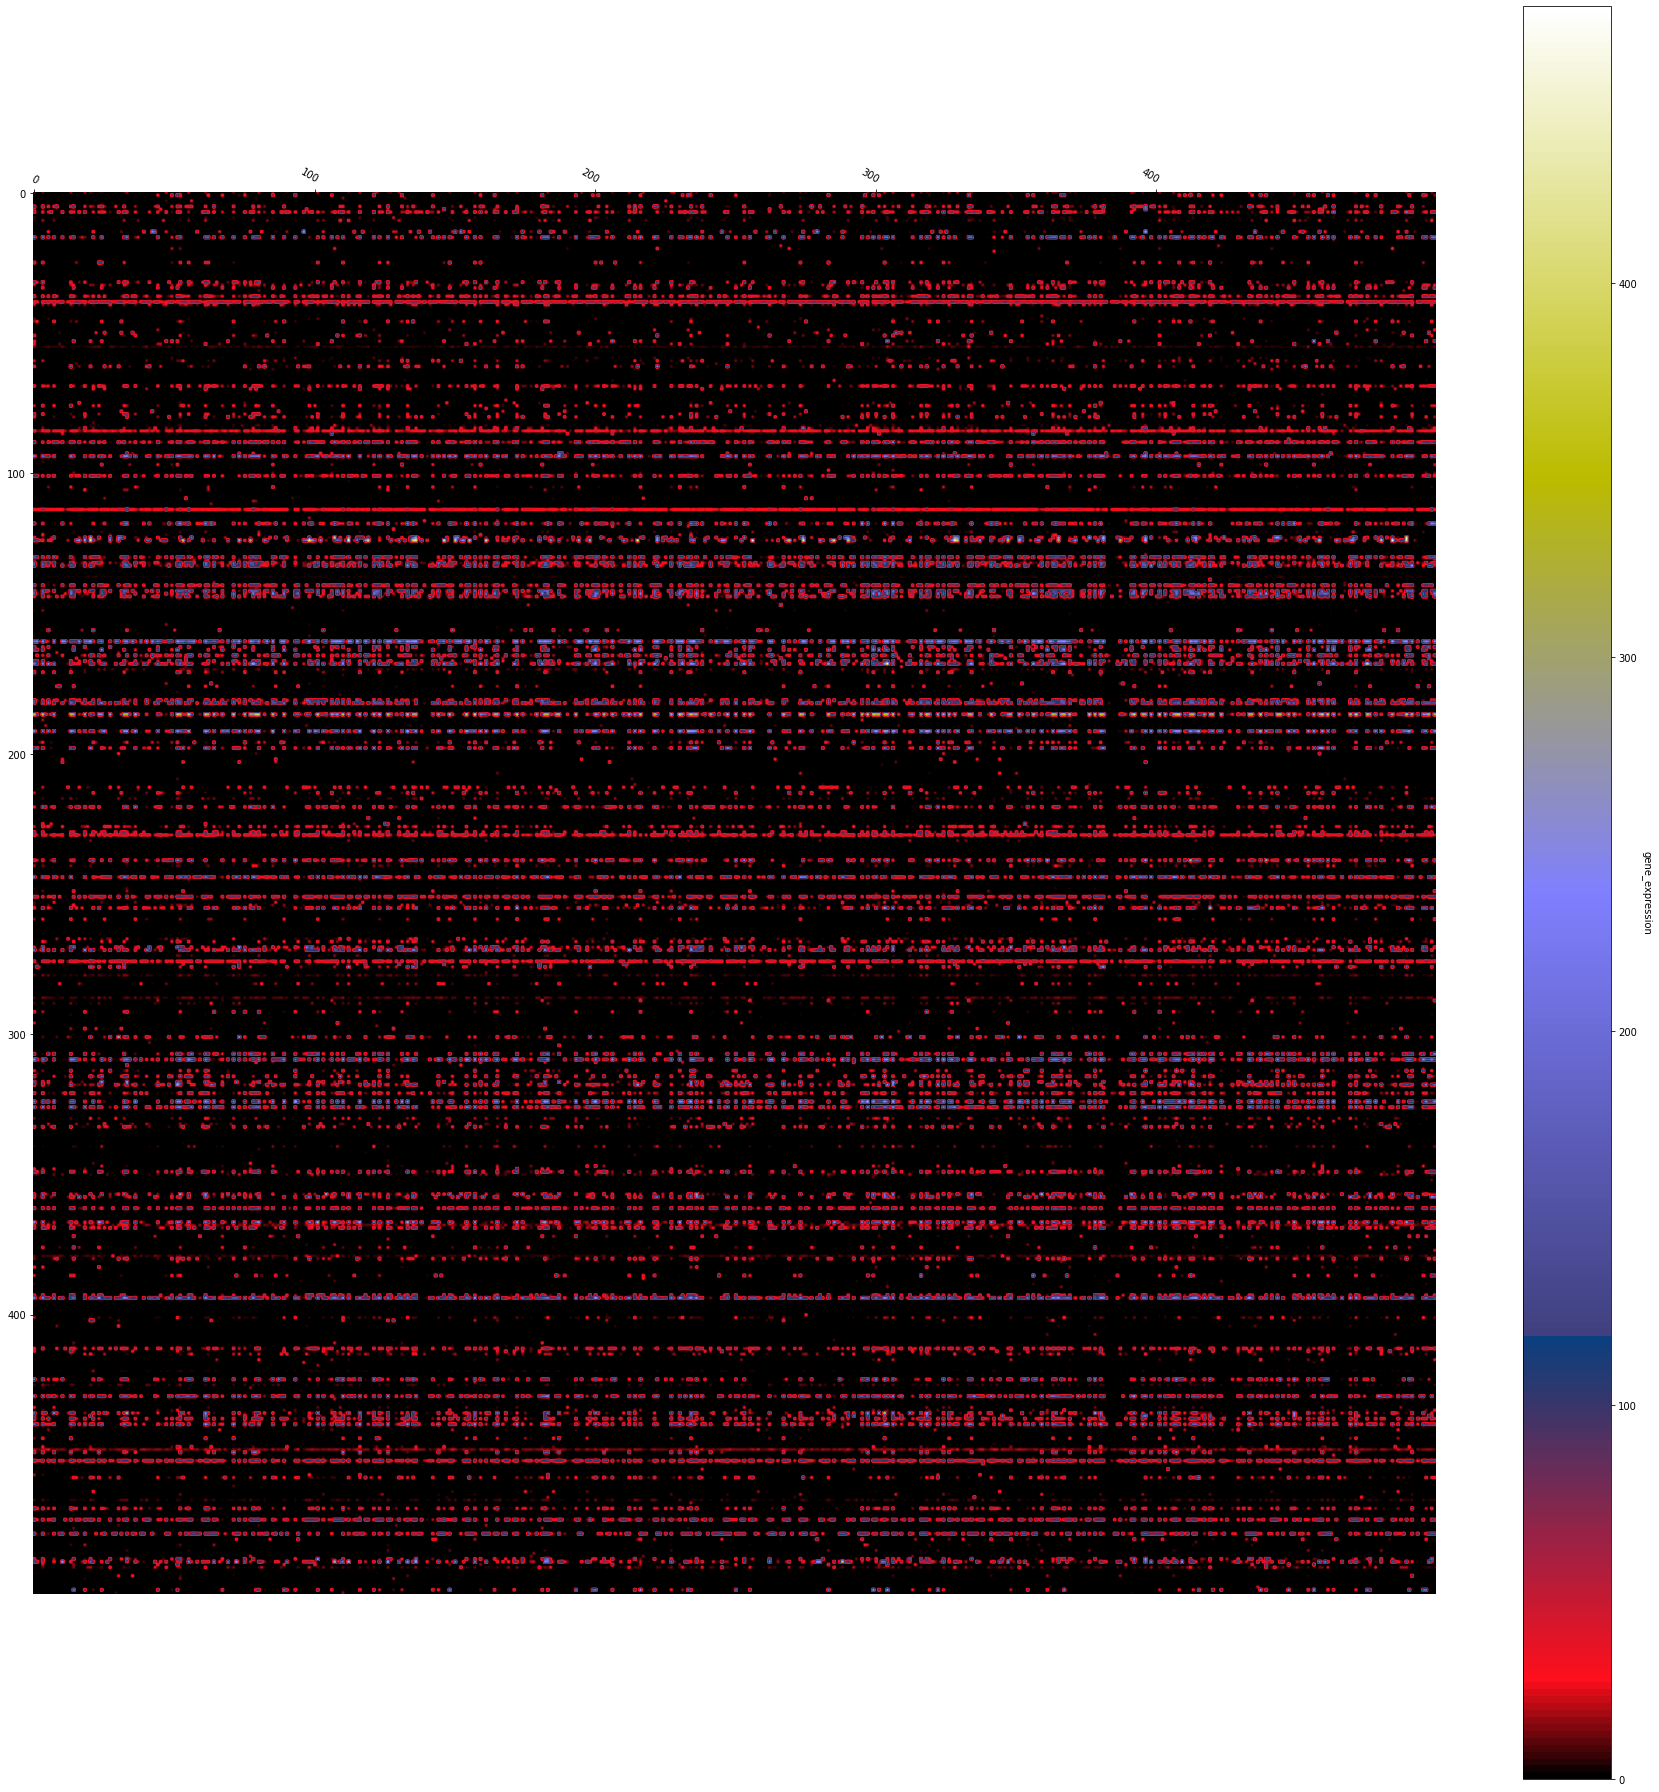

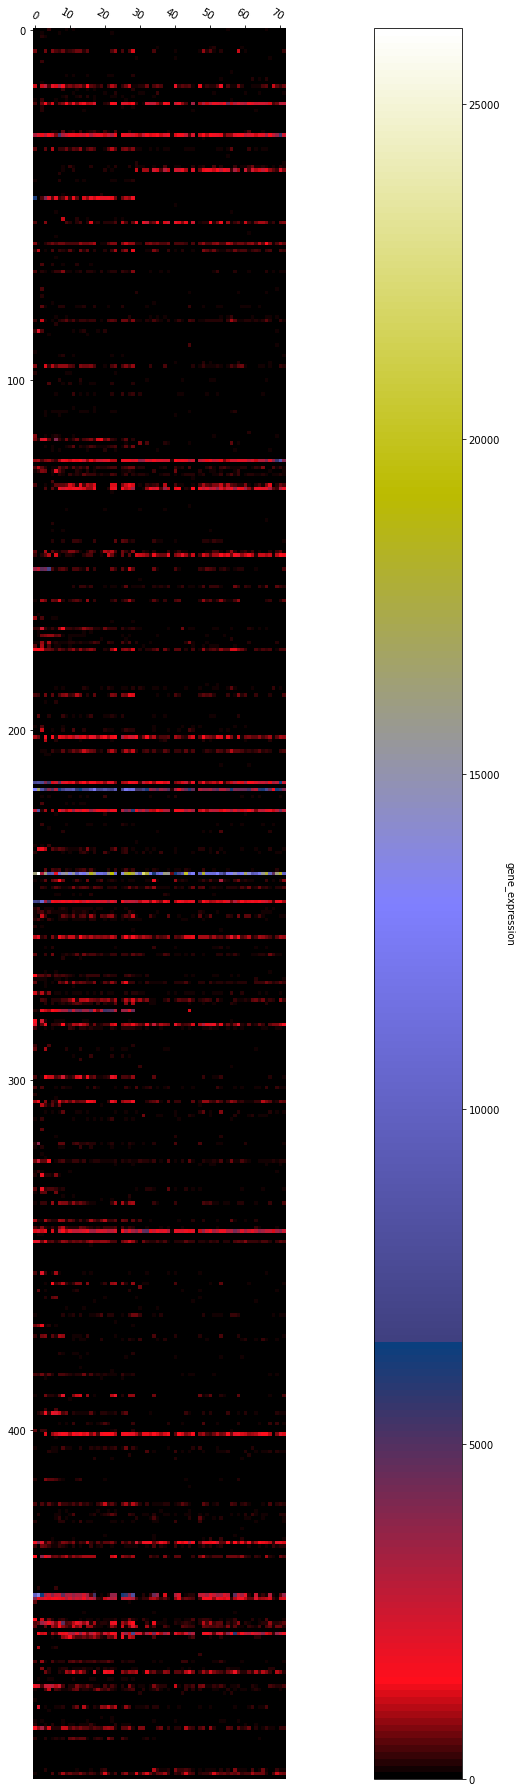

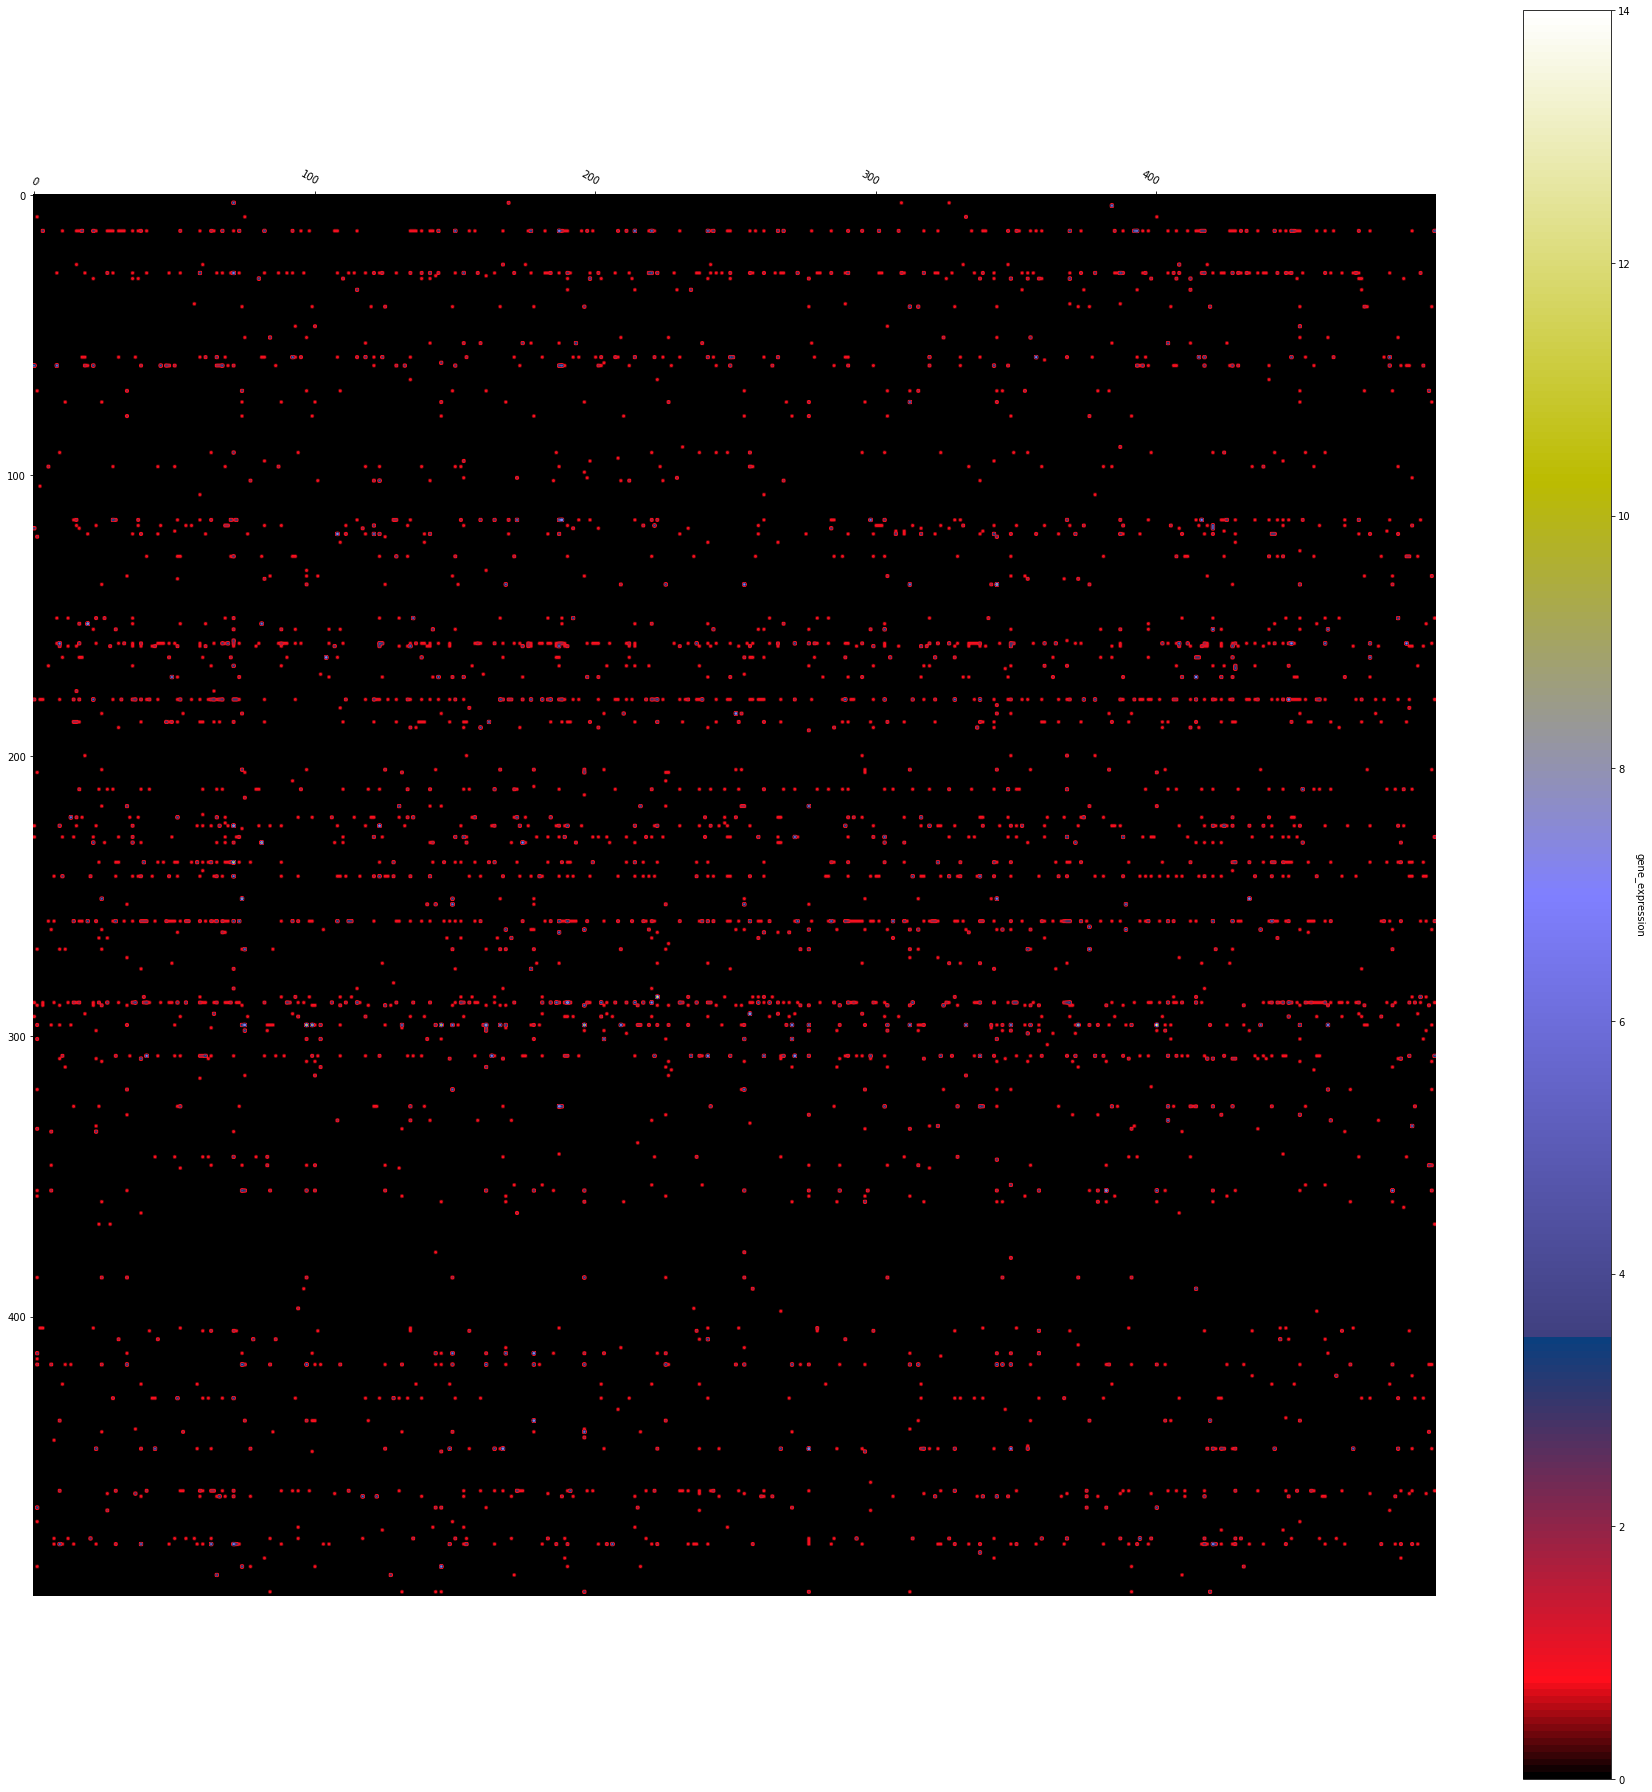

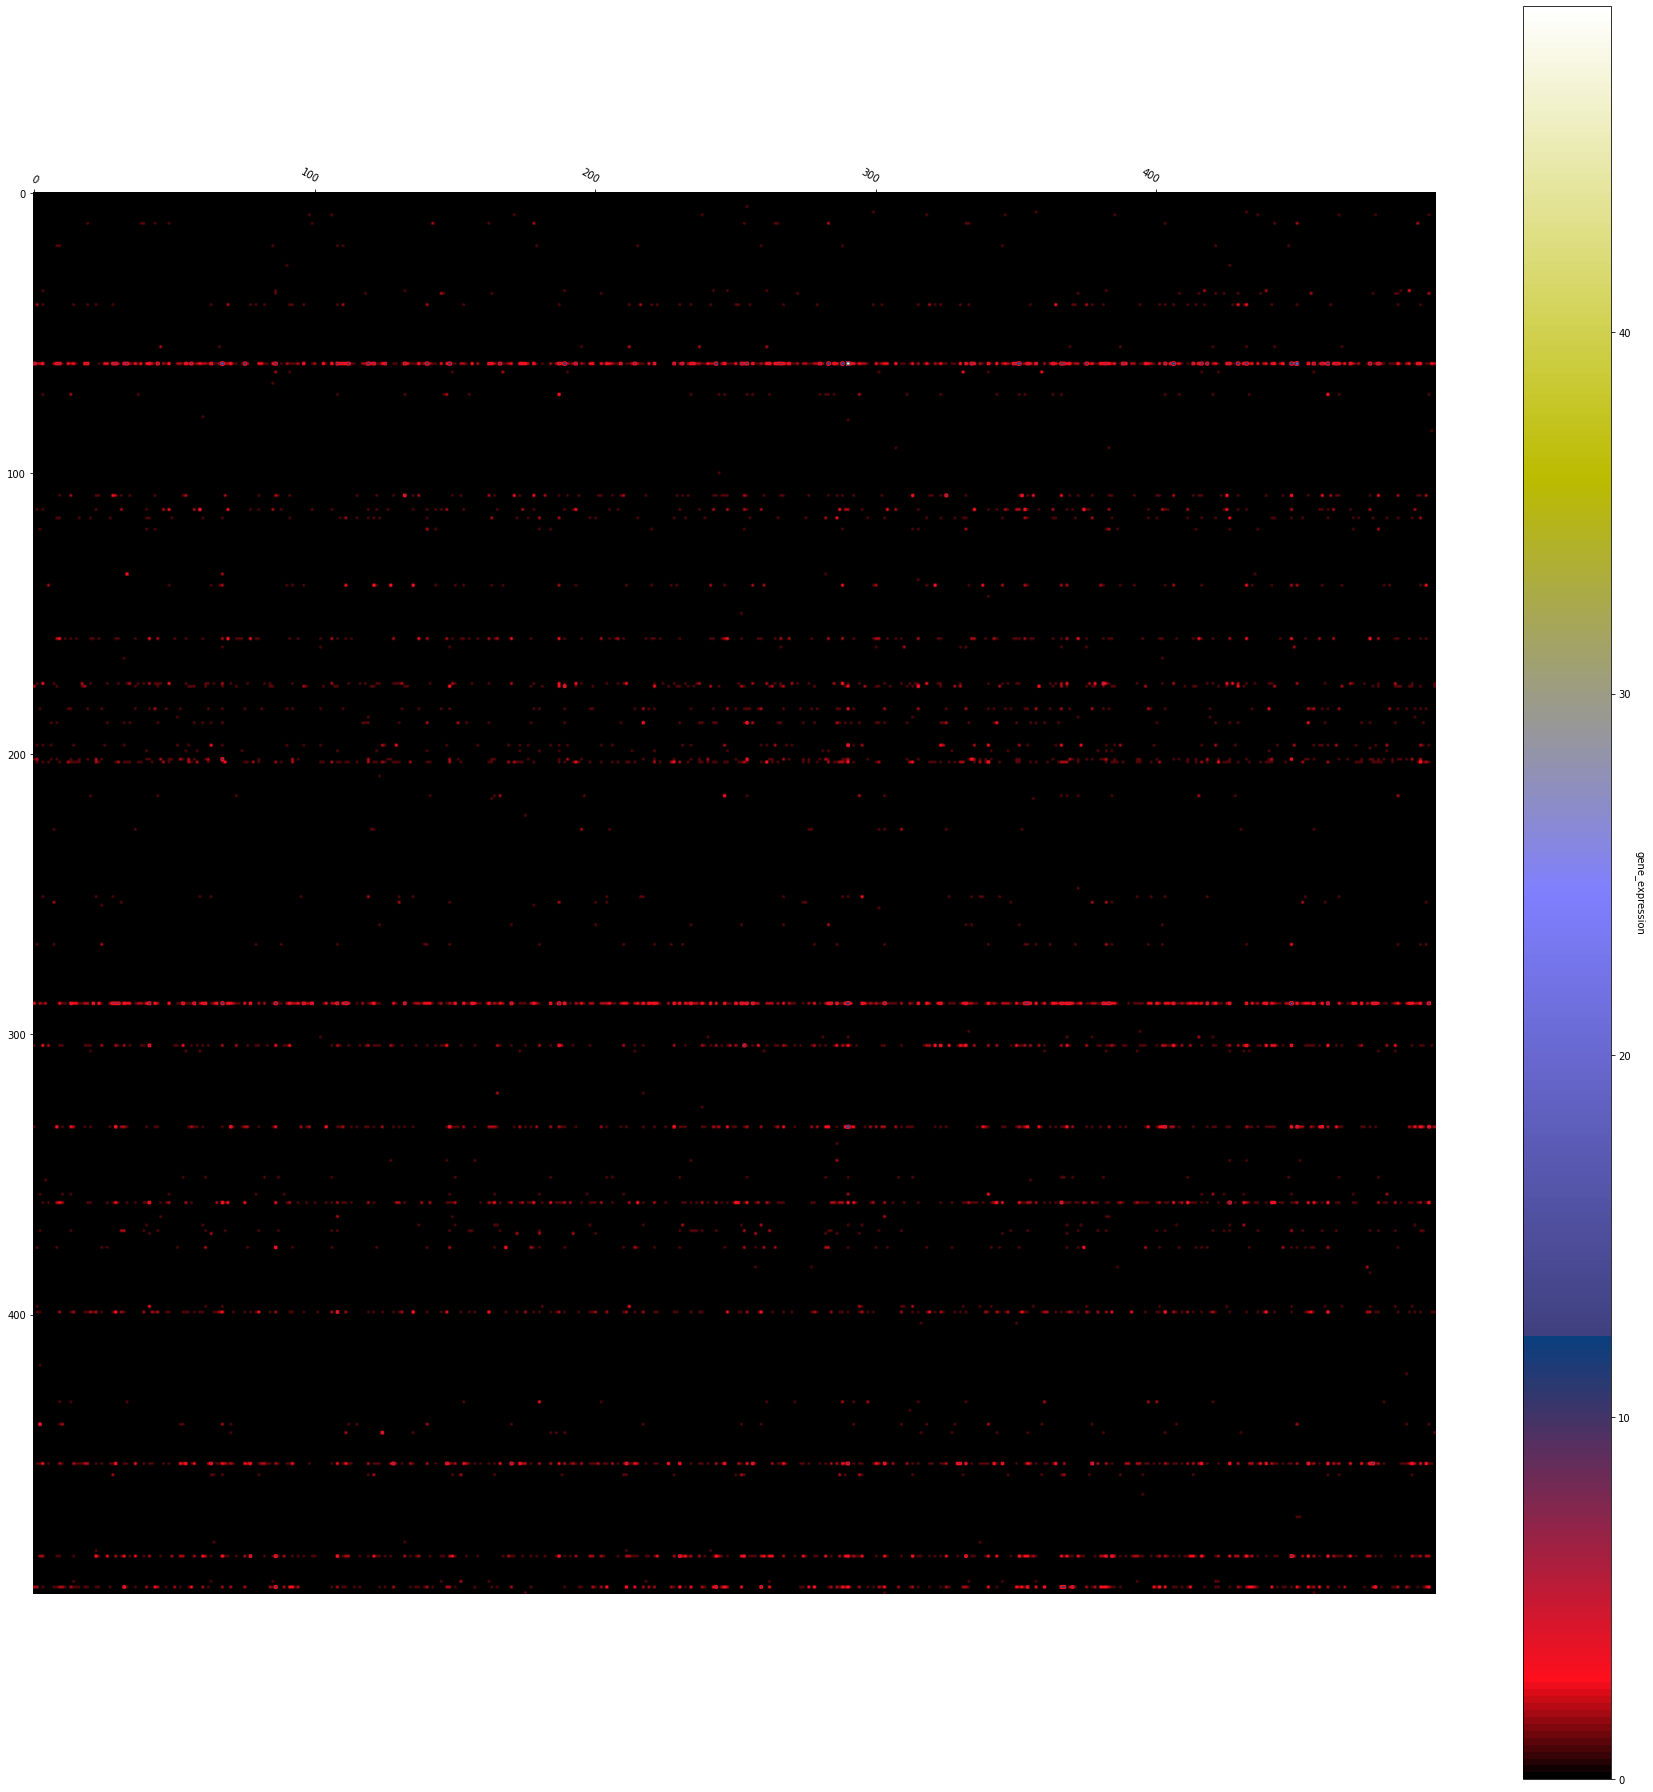

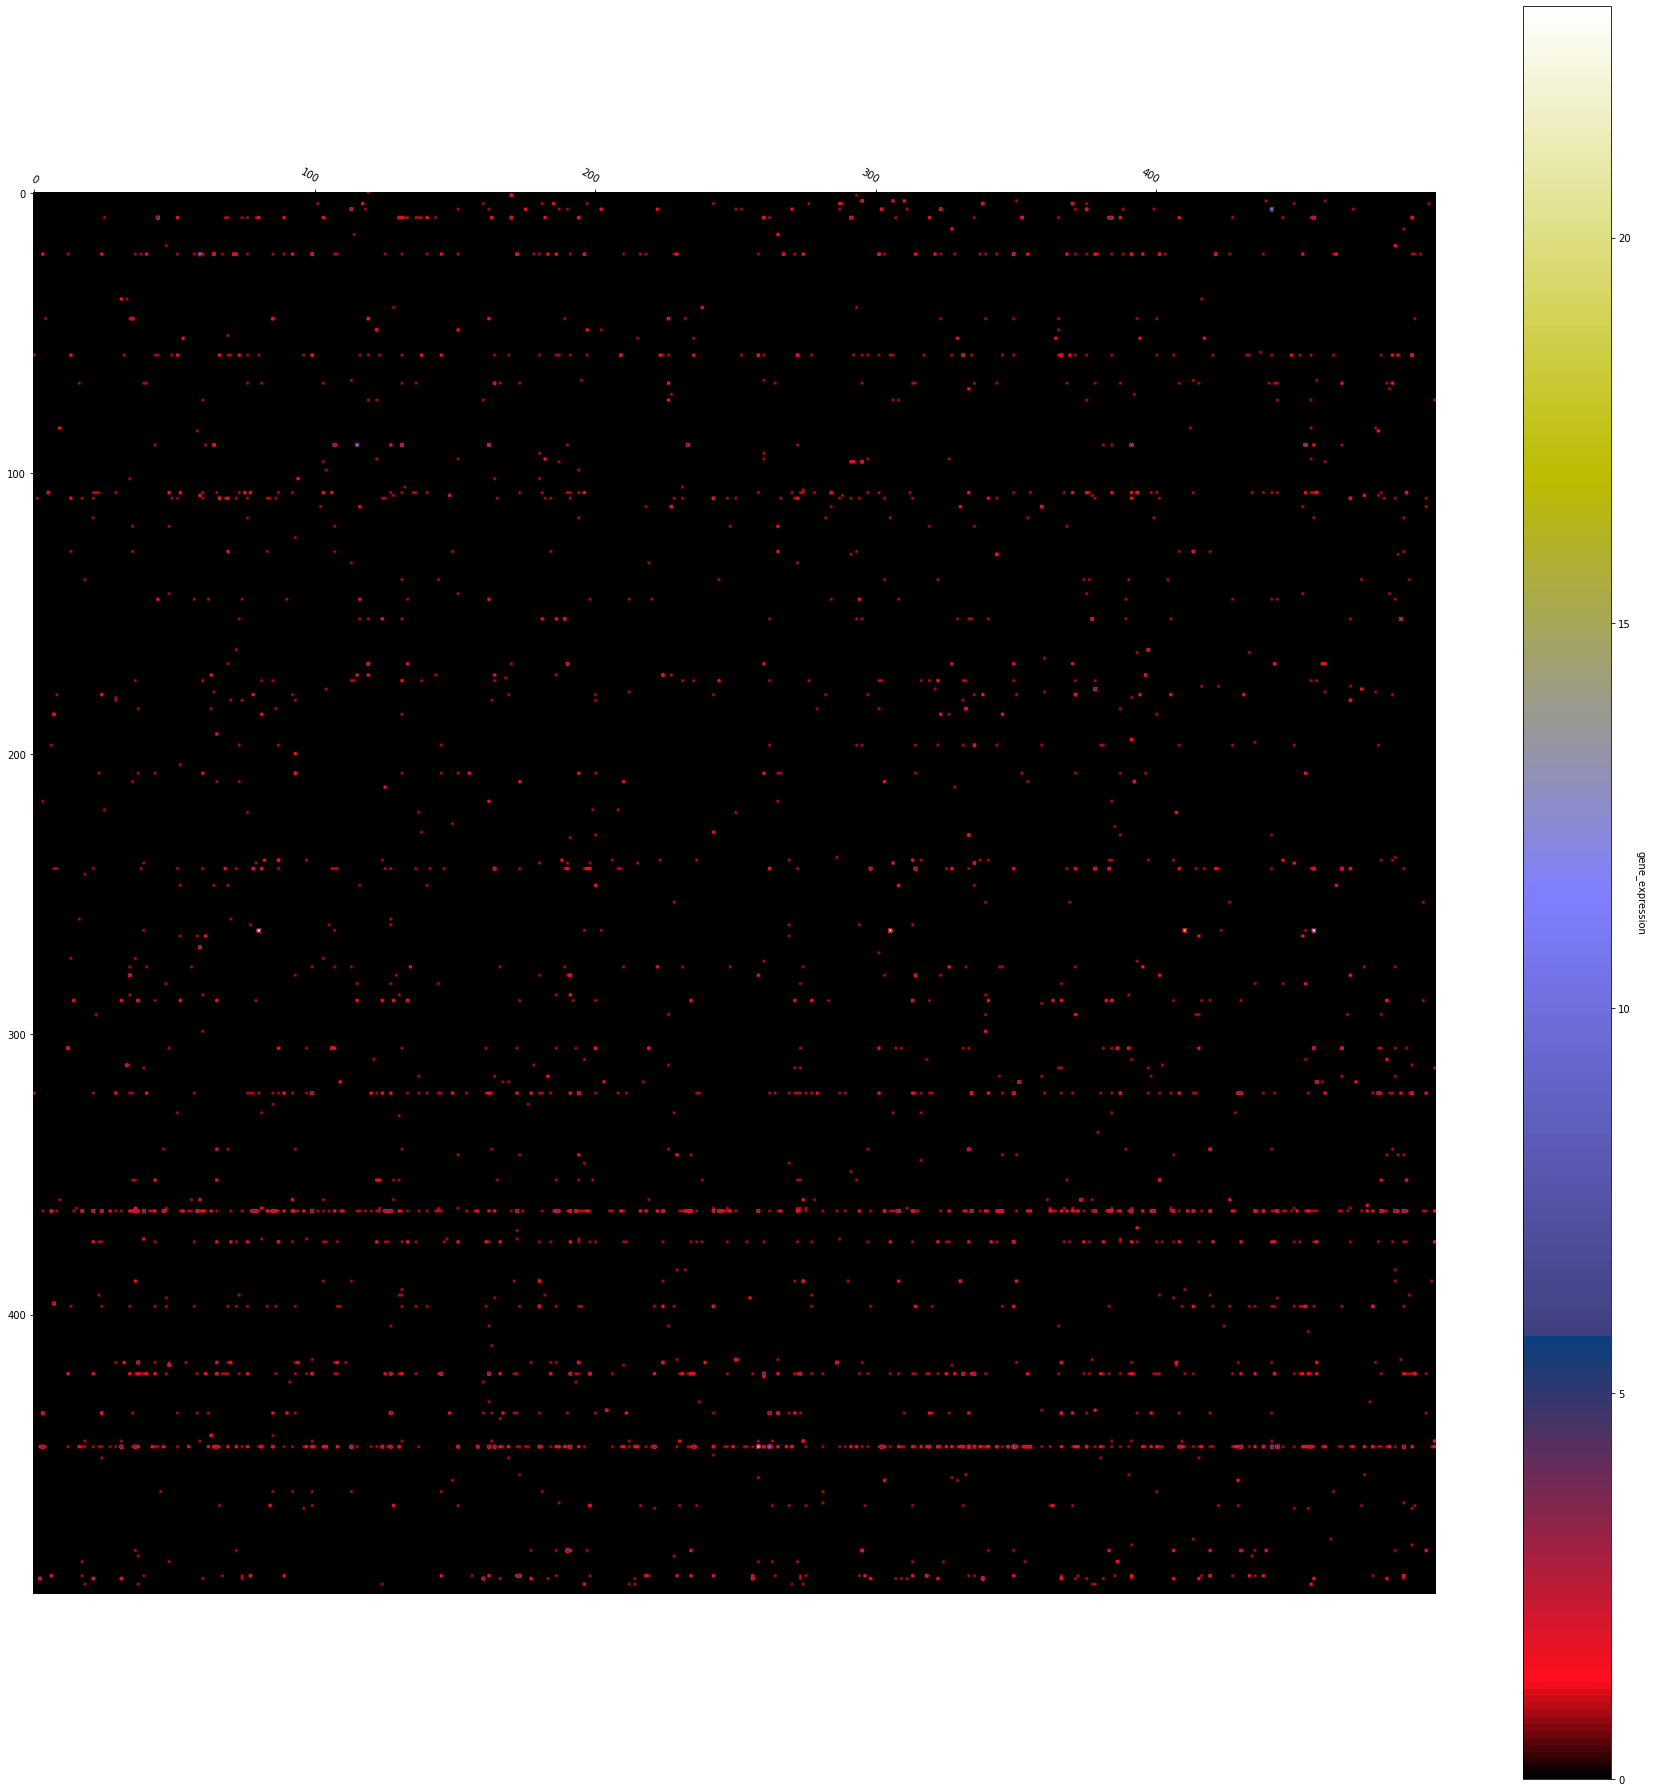

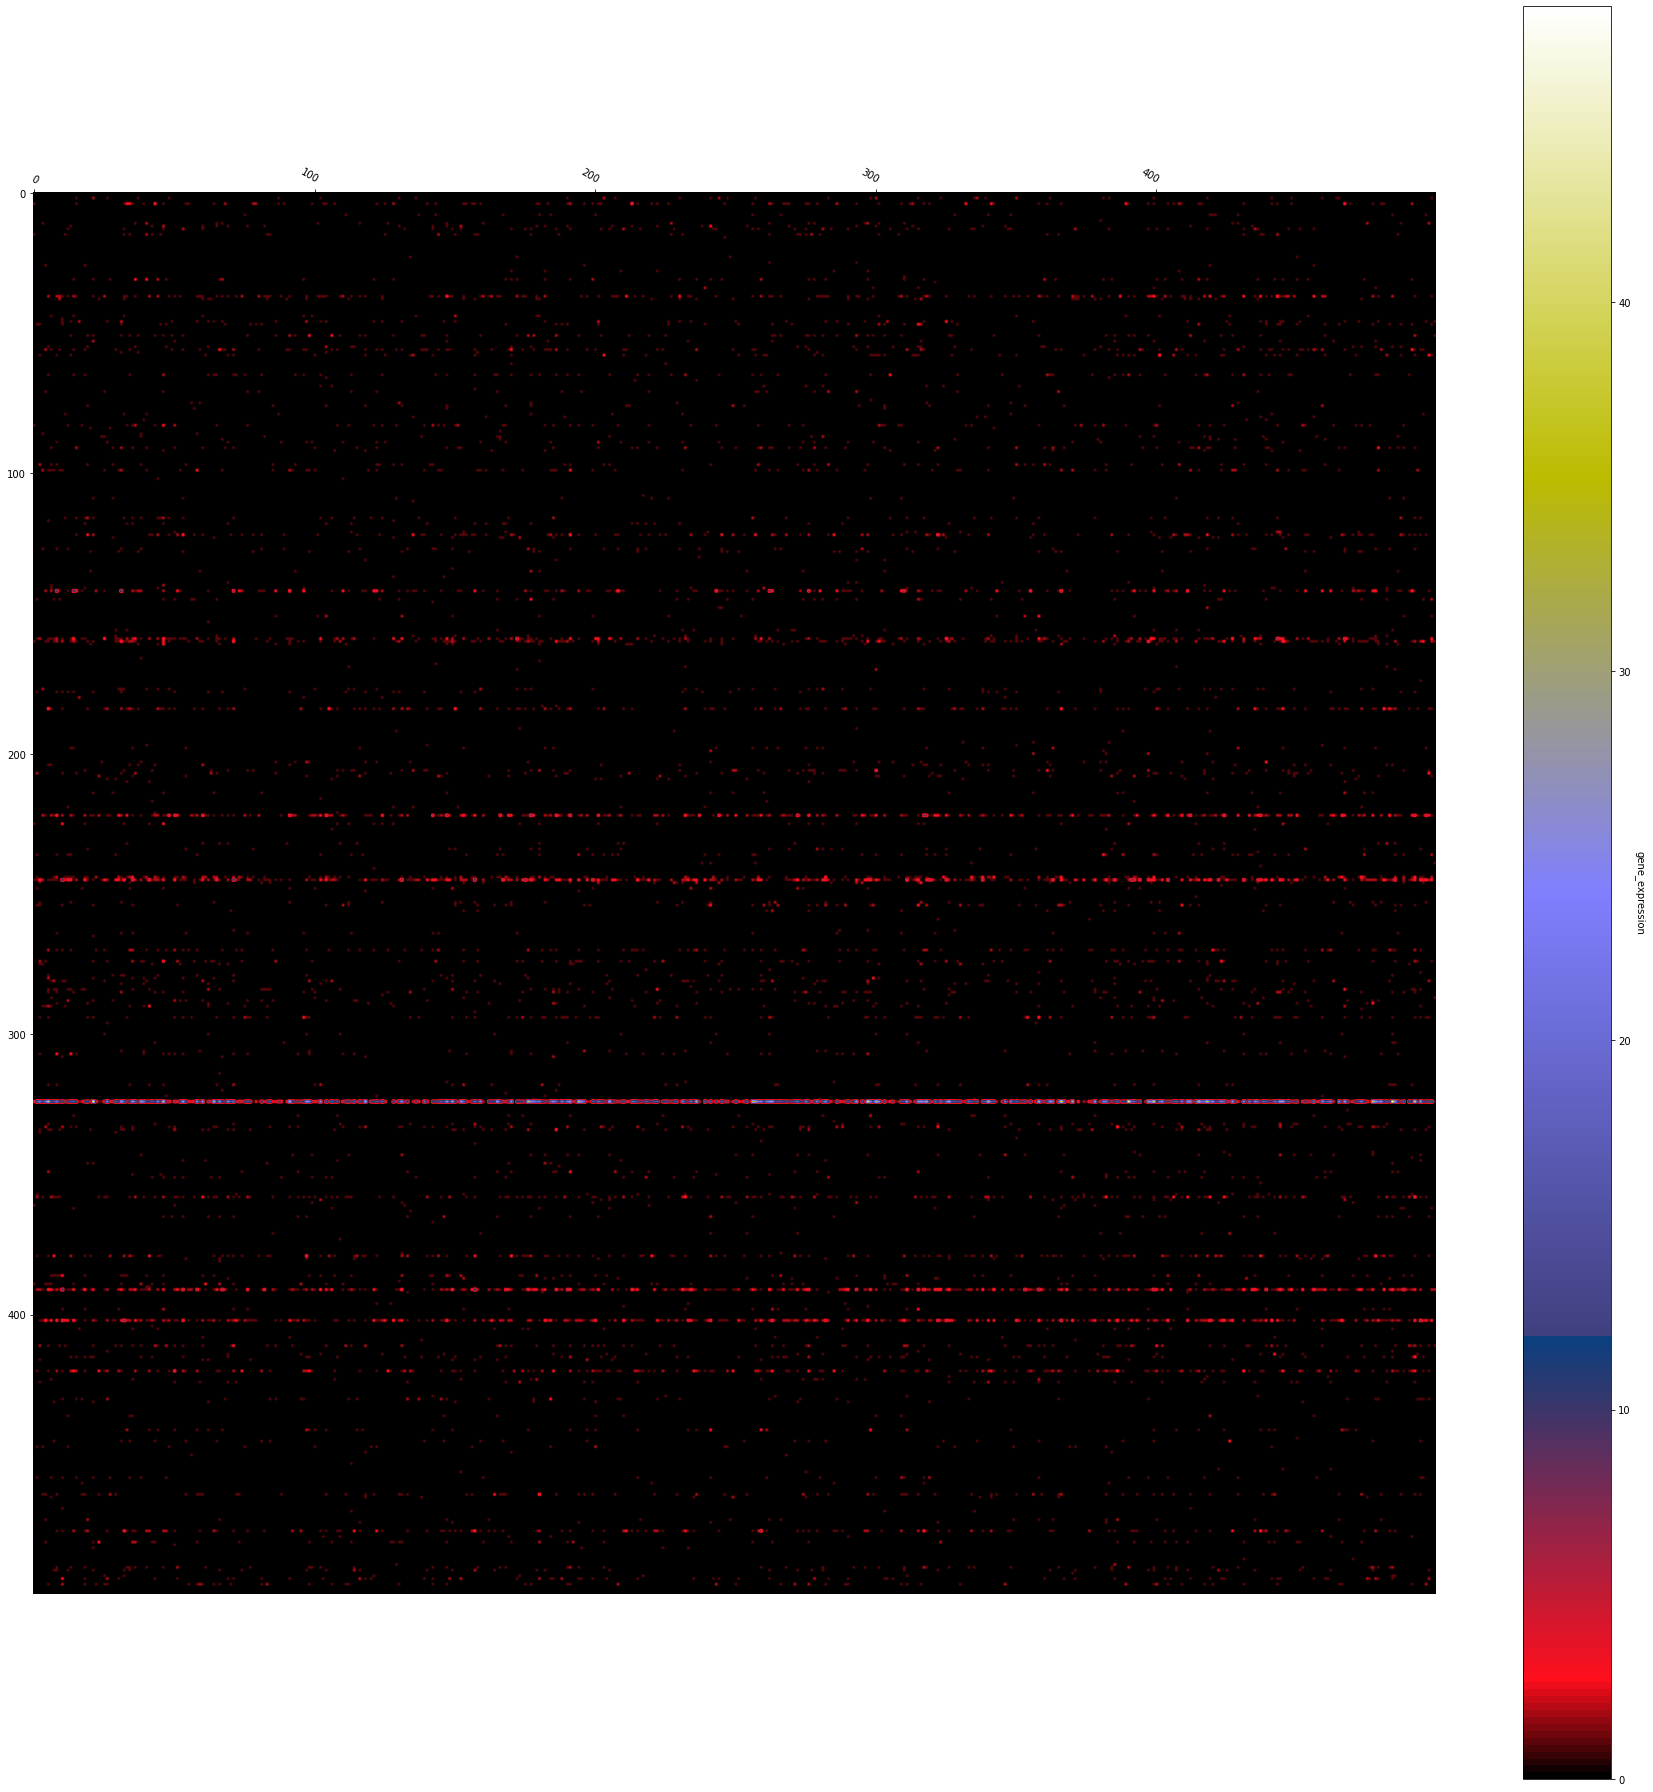

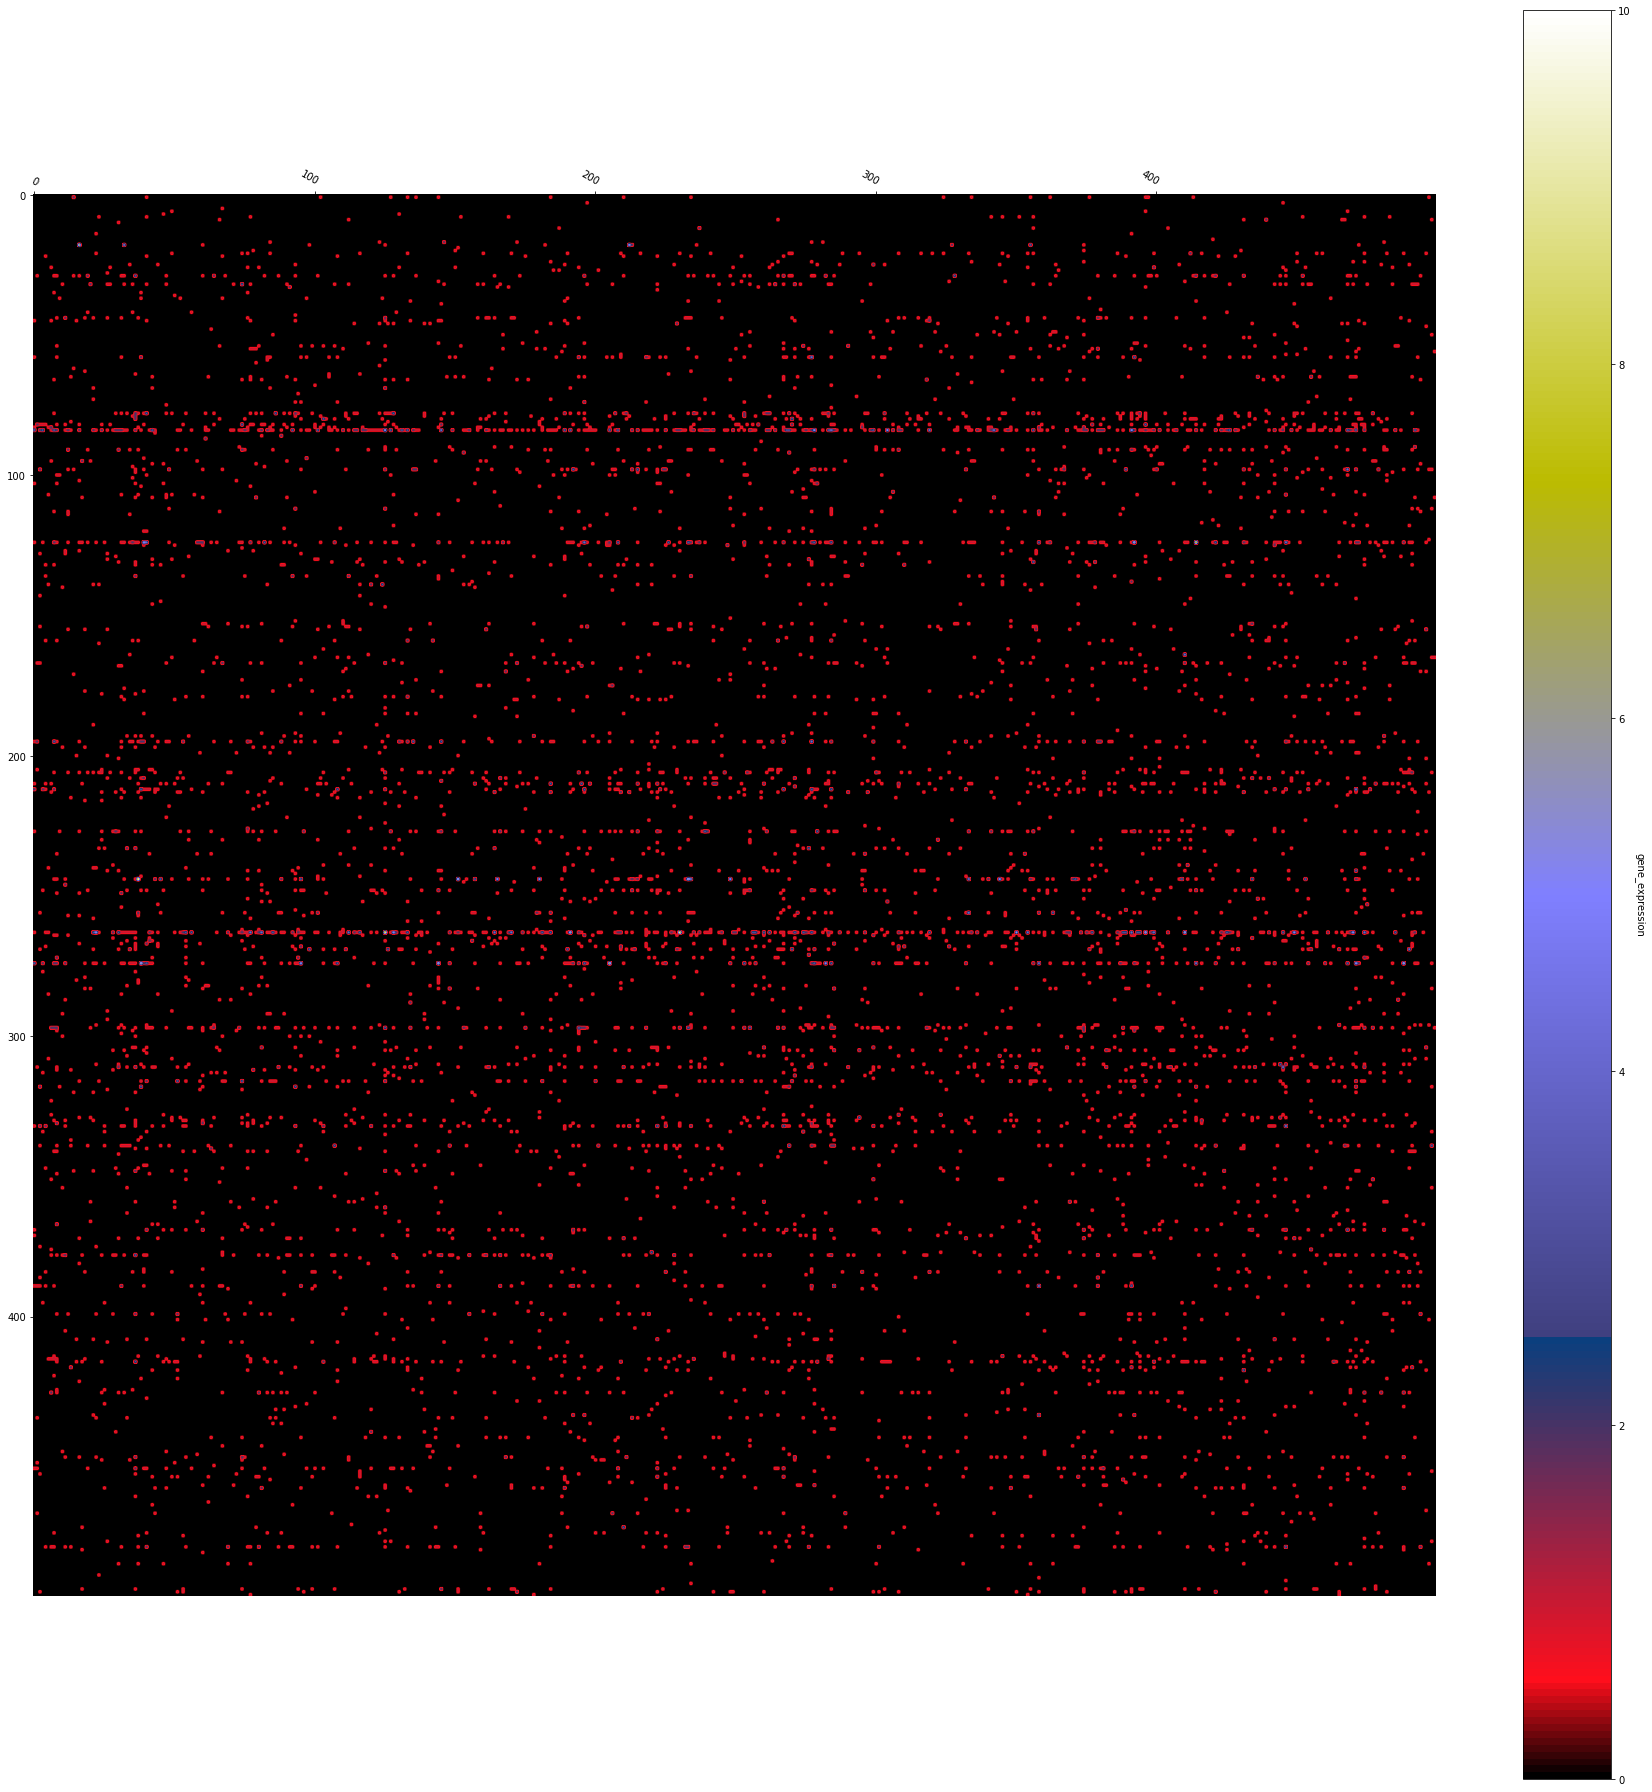

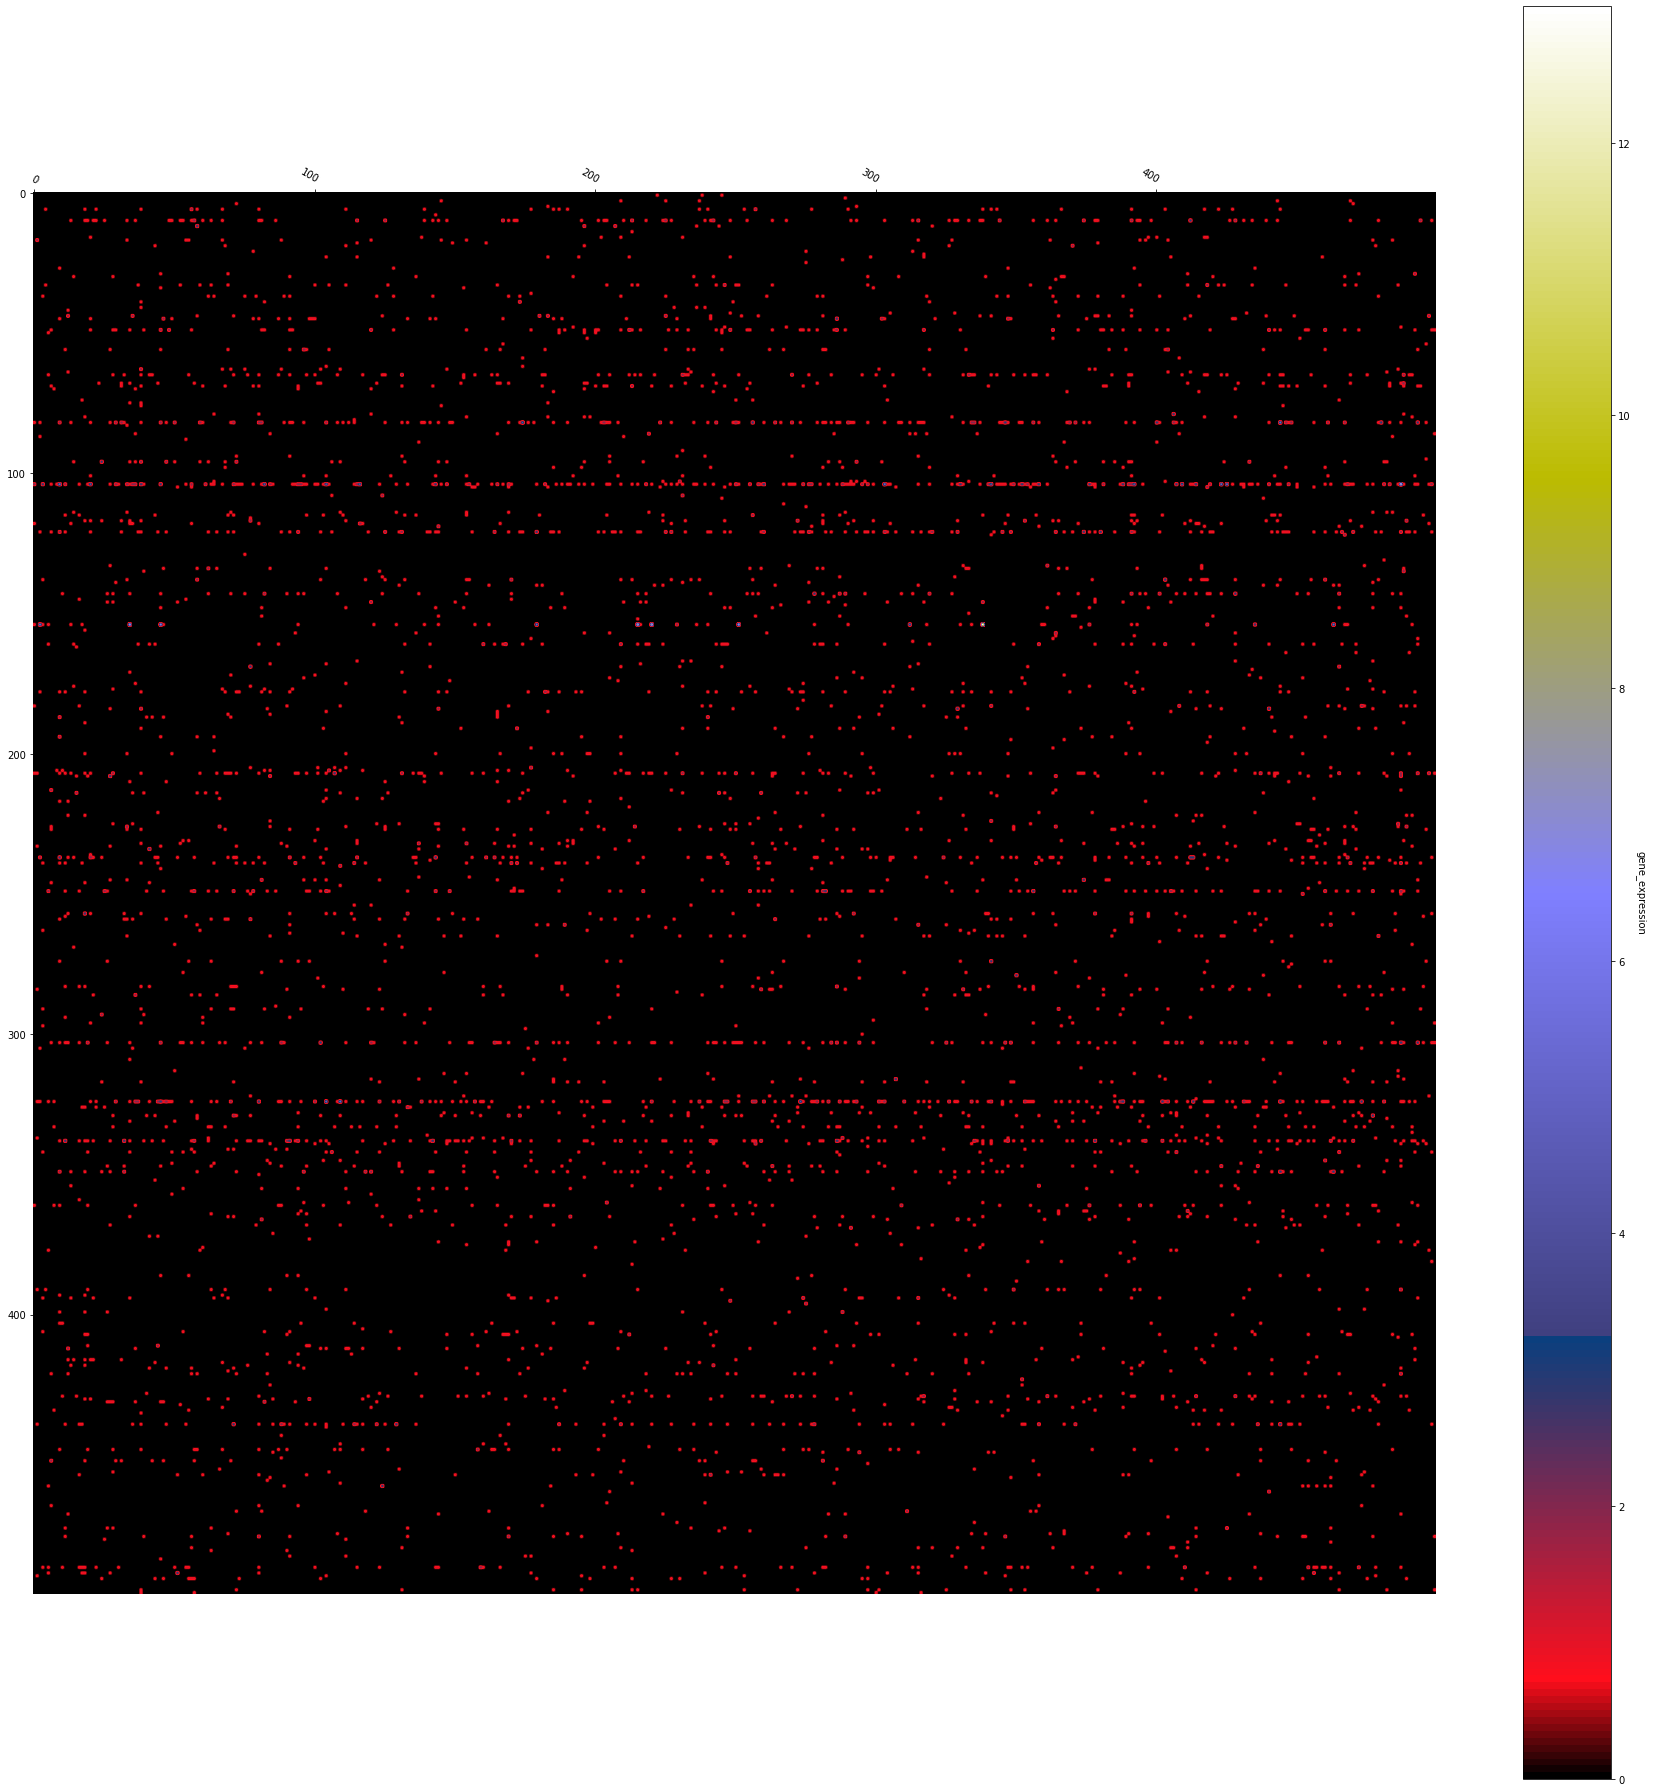

In [3]:
plt.rcParams['figure.figsize'] = (25, 25)
plt.figure(dpi=600)

gene_non_zeros = []
cell_non_zeros = []

for i, j in zip(samples, rnas):
    if 'txt' in j:
        df = pd.read_csv(f'data/processed/{i}/RNA/{j}', sep='\t', index_col=0)
    else:
        df = pd.read_csv(f'data/processed/{i}/RNA/{j}', sep=' ',
                         usecols=[0, 1, 2], skiprows=2,
                         names=['gene', 'cell', 'count'])
        matrix = np.zeros((df.gene.max(), df.cell.max()), np.int16)
        for row in df.itertuples(index=False):
            matrix[row.gene - 1][row.cell - 1] = row.count
        df = pd.DataFrame(matrix)
    print(df.head(10))
    gene_non_zeros.append((df != 0).sum(axis=1) / df.shape[1] * 100)
    cell_non_zeros.append((df != 0).sum() / df.shape[0] * 100)
    
    
    part = df.sample(500, axis=0)
    try:
        part = part.sample(500, axis=1)
    except ValueError:
        pass
    
    fig, ax = plt.subplots()
    try:
        im, cbar = utils.heatmap(part, [], [], ax=ax,
                                 cmap='gist_stern', cbarlabel='gene_expression')
    except TypeError:
        print(i)
        print(j)
        print(df.head)
        raise TypeError
    fig.tight_layout()
    plt.savefig(f'./image/heatmap/{i}.jpg', format='jpg')


In [33]:
with open('gene_non_zeros.pkl', 'wb') as f1,\
     open('cell_non_zeros.pkl', 'wb') as f2:
    pickle.dump(gene_non_zeros, f1, pickle.HIGHEST_PROTOCOL)
    pickle.dump(cell_non_zeros, f2, pickle.HIGHEST_PROTOCOL)

# Meta-data

In [7]:
samples = os.listdir('data/processed')
samples = samples[1:6] + samples[7:]
rnas = ['matrix.mtx', 'matrix.mtx', 'matrix.mtx',  # Paired-seq
        'counts.txt', 'counts.txt',  # scCAT-seq
        'matrix.mtx.gz', 'counts.mtx.gz', 'matrix.mtx.gz',  # sci-CAR
        'counts.mtx.gz', 'counts.txt.gz', 'counts.mtx.gz']  # SNARE-seq

num = 10
i = samples[num]
j = rnas[num]
if 'txt' in j:
    df = pd.read_csv(f'data/processed/{i}/RNA/{j}', sep='\t', index_col=0)
else:
    df = pd.read_csv(f'data/processed/{i}/RNA/{j}', sep=' ',
                     usecols=[0, 1, 2], skiprows=2,
                     names=['gene', 'cell', 'count'])
    matrix = np.zeros((df.gene.max(), df.cell.max()), np.int16)
    for row in df.itertuples(index=False):
        matrix[row.gene - 1][row.cell - 1] = row.count
    df = pd.DataFrame(matrix)
print(df.columns)
df

RangeIndex(start=0, stop=5081, step=1)


,0,1,2,3,4,5,6,7,8,9,...,5071,5072,5073,5074,5075,5076,5077,5078,5079,5080
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19319,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
19320,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
from collections import Counter

a = ['_'.join(i.split('_')[:-1]) for i in df.columns]
print(sum('K562' in i for i in a))
print(sum('HCT116' in i for i in a))
print(sum('HeLa-S3' in i for i in a))
print(sum('PDX1' in i for i in a))
print(sum('PDX2' in i for i in a))
b = Counter(a)
b

0
0
0
0
0


Counter({'scCAT_Morula': 29, 'scCAT_Blastocyst': 43})

In [33]:
cells = pd.read_csv(f'data/processed/{i}/RNA/barcodes.tsv')
cells

FileNotFoundError: [Errno 2] No such file or directory: 'data/processed/scCAT-seq_cellline/RNA/barcodes.tsv'

In [29]:
embedding = pd.read_csv(f'data/processed/{i}/Cell_embeddings.xls', sep='\t')

In [30]:
embedding

,ID,Stage,Rep,Ident,Dim1,Dim2
0,01:30:88:16,Adult,2,7,-1.786314,-3.087099
1,02:03:35:21,Adult,1,5,-0.883296,-0.008344
2,02:03:73:23,Adult,1,4,1.599593,-2.082603
3,02:04:46:38,Adult,2,3,3.978912,-0.334285
4,02:04:66:36,Adult,2,4,-1.511953,-0.329731
...,...,...,...,...,...,...
25840,96:96:22:38,Adult,2,6,-1.393702,4.001185
25841,96:96:25:33,Adult,1,5,-1.213279,0.877619
25842,96:96:25:38,Adult,2,5,3.404119,0.167555
25843,96:96:31:44,E16.5,2,4,1.271936,-1.258087


In [31]:
embedding.Stage.value_counts()

Adult    14328
E16.5     7091
E12.5     4424
E16.4        1
E16.2        1
Name: Stage, dtype: int64